# Постановка задачи

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# План выполнения проекта

- Откроем файл с данными и изучите общую информацию
- Подготовим данные к проведению анализа
- Проведем исследовательский анализ
- Составим портерт пользователя каждого региона
- Проверим гипотезы
- Сделаем выводы

# ШАГ 1:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')
display(games)
games.info()
games.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Первое что хочется сделать - это привести названия столбцов к нижнему регистру. В глаза бросается, что год релиза - не целочисленное, скорее всего, это из-за наличия случайных пропусков. 

# ШАГ 2:

In [3]:
games.columns = games.columns.str.lower() #привели названия столбцов к нижнему регистру
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Так как год измеряется в целых числах, то целесообразно будет поменять тип на int. Для начала посмотрим на наличие пропусков. 

In [4]:
print('Процент пропусков в столбце с годами выпуска {:.1%}'.format(games['year_of_release'].isnull().sum()  / len(games['year_of_release'])))

Процент пропусков в столбце с годами выпуска 1.6%


Пропусков чуть больше 1%, попробуем удалить пропуски из столбца.

In [5]:
#games = games.dropna(subset=['year_of_release'])
#games.isnull().sum()

In [6]:
#games['year_of_release'] = games['year_of_release'].astype('int16') 
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Пропуски в именах и названии жанров заменим на 'no name' и 'unknown' соответственно. Столбец 'user_score' надо привести к типу float, но в столбце  есть 'tbd'- нечто непонятное, поэтому заменим на NaN. Пропуски в очках можно заменить на -1.На 0 нельзя, т.к может смешаться с реальными 0 оценками. А в столбце с рейтингом, не знаем причины отсутствия рейтинга, поэтому оставим как есть. 

In [7]:
games['name'] = games['name'].fillna('no name')
games['genre'] = games['genre'].fillna('unknown')
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games ['user_score'].fillna(-1)
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan 
games['user_score'] = games['user_score'].astype('float') # поменяем тип на числа с плавающей точкой
games.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         2424
rating             6766
dtype: int64

In [8]:
#посчитаем суммарные продажи во всех регионах
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,31.38


Привели данные в порядок, можем выполнять анализ.

# ШАГ 3:

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

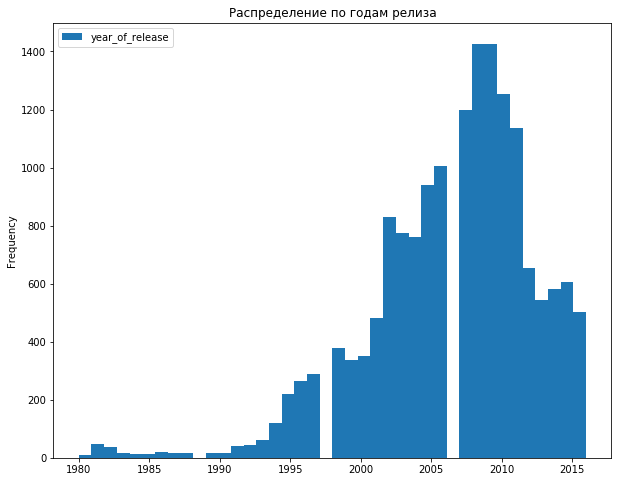

In [9]:
#посмотрим сколько игр выпускались каждый год
ax = games['year_of_release'].plot(kind='hist', bins=40, figsize=(10,8)).legend()
plt.title('Распределение по годам релиза')
games['year_of_release'].value_counts()

Получили данные о количестве игр, выпускавшихся каждый год. Целесообразно будет рассамтривать года, когда выпускались более 100 игр. 

In [10]:
games = games.query('year_of_release > 1993')
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,31.38
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80


In [11]:
platform_sales = games[['platform','total_sales']].groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales)
#print(top_5_platforms) # топ 5 платформ с наибольшими суммарными продажами 

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       252.66
XB       251.57
N64      218.01
GC       196.73
XOne     159.32
GB       152.08
SNES      84.67
WiiU      82.19
PSV       53.81
SAT       33.59
DC        15.95
GEN        8.13
WS         1.42
NG         1.23
SCD        0.36
TG16       0.16
NES        0.11
3DO        0.10
PCFX       0.03
Name: total_sales, dtype: float64


In [12]:
top_5 = games.query('platform in ("PS2", "X360", "PS3", "Wii", "DS")')
display(top_5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.00,-1.0,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,-1.0,-1.0,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01


Text(0.5, 1.0, 'Распределение по годам релиза')

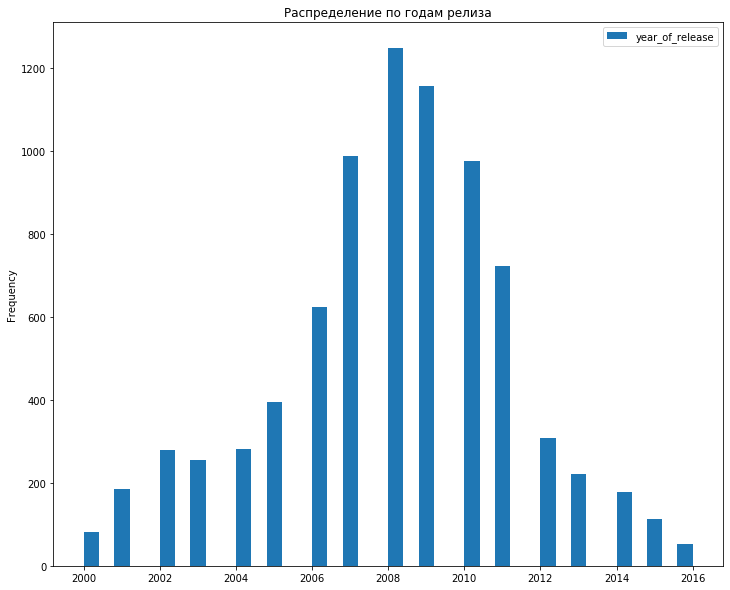

In [13]:
plt.figure(figsize=(12,10))
ax = top_5['year_of_release'].plot(kind='hist', bins=40).legend()
plt.title('Распределение по годам релиза')

Видим, что с начала 00-ых постепенный рост релизов, с усовершенствованием видеоадаптеров. Пик приходится на 2008г. Но с 2010 видим спад, что связано скорее всего с переходом на мобильные платформы.

In [14]:
# функция распределяния выхода игр для платформ
def distribution_by_platform(platform_name):
    plt.figure(figsize=(8,6))
    ax = games.query(f'platform=="{platform_name}"')['year_of_release'].plot(kind='hist', bins=40).legend()
    plt.title(f'Распределение по годам релиза для платформы "{platform_name}"')

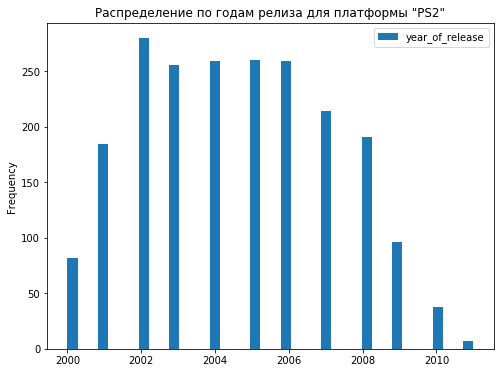

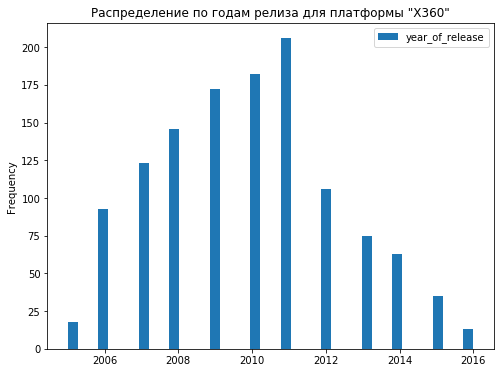

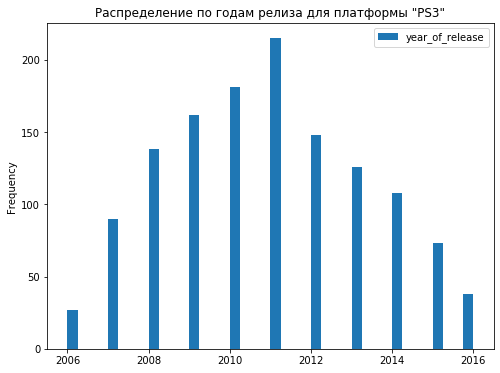

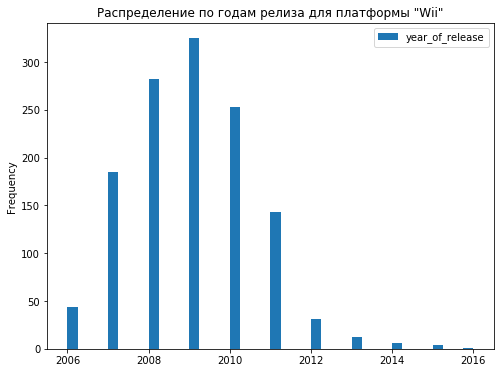

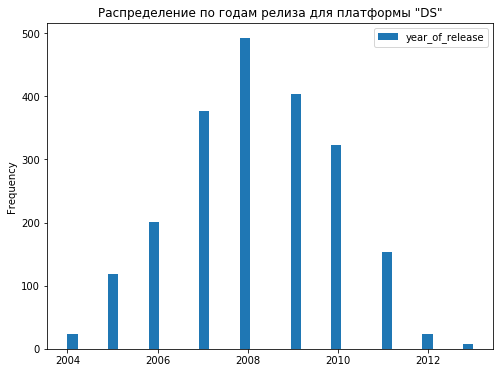

In [15]:
#распределение выхода игр для топ-5 популярных платформ
distribution_by_platform("PS2")
distribution_by_platform("X360")
distribution_by_platform("PS3")
distribution_by_platform("Wii")
distribution_by_platform("DS")

Из полученных распределений видим, средняя продолжительность жизни платформы примерно 10-11лет.

Видим равномерный спад, начиная с 2012 года, тогда можем принять за актуальный период данные с 2012 и позже.

In [16]:
#сочтем за актуальный период данные за 2016г.
current_period = games.query('year_of_release >= 2012')
display(current_period)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01


In [17]:
platform_sales_in_current_period = current_period[['platform','total_sales']].groupby('platform')['total_sales'].sum().sort_values(ascending=False)
display(platform_sales_in_current_period)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

5-ка самых популярных плтформ с 2012: PS4, PS3, X360, 3DS, XOne.


К 2016 году релизы на платформах PS4, XOne, 3DS  выросли, что показывает их потенциальную прибыльность. Также виден спад на платформах PS3, X360 и Wii, которые лидировали ранее.

In [18]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16079.000000,16079.000000,16079.000000,16079.000000,16079.00000,16079.000000,13703.000000,16079.000000
mean,2006.918776,0.249924,0.145565,0.068677,0.04794,33.738106,3.424403,0.512105
std,5.138981,0.715359,0.508146,0.282183,0.18936,36.345299,4.195894,1.470474
min,1994.000000,0.000000,0.000000,0.000000,0.00000,-1.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.00000,-1.000000,-1.000000,0.060000
50%,2008.000000,0.080000,0.020000,0.000000,0.01000,-1.000000,4.800000,0.160000
75%,2011.000000,0.230000,0.110000,0.030000,0.03000,71.000000,7.600000,0.450000
max,2016.000000,41.360000,28.960000,10.220000,10.57000,98.000000,9.700000,82.540000


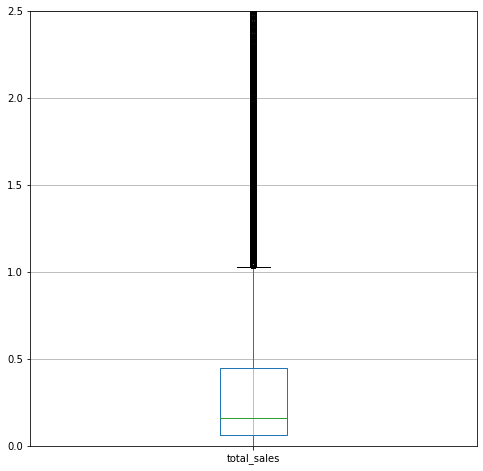

In [19]:
plot = games.boxplot('total_sales', figsize=(8, 8)).set_ylim(0, 2.5)

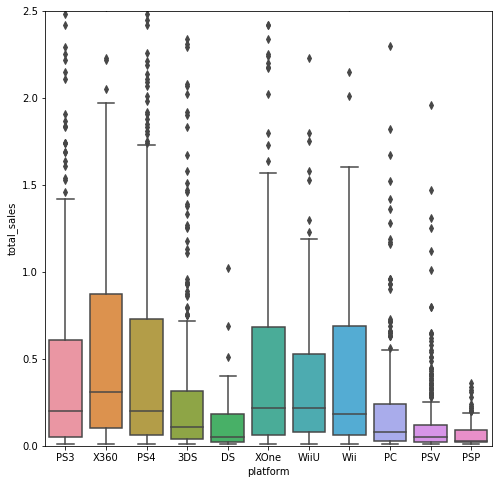

In [20]:
plt.figure(figsize=(8, 8))
ax = sns.boxplot(x="platform", y="total_sales", data=current_period).set_ylim(0,2.5)

Полученные данные потвердили предположение о том, что PS4, XOne и 3DS являются самыми перспективными.

In [21]:
#Посмотрим, как влияют на продажи внутри PS4  за актуальный период отзывы пользователей и критиков.
ps4_current_period = current_period.query('platform == "PS4"').reset_index()
display(ps4_current_period)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NaN,14.63
1,42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
3,87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,NaN,7.98
4,92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,16500,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
388,16503,Shin Hayarigami 2,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
389,16526,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
390,16530,Carmageddon: Max Damage,PS4,2016.0,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


In [22]:
# оценки пользователей на PS4 в 2016
ps4_current_period[ps4_current_period['user_score'] > 0].sort_values(by='user_score',ascending=False).head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,303,The Witcher 3: Wild Hunt,PS4,2015.0,Role-Playing,1.02,2.13,0.23,0.59,92.0,9.2,M,3.97
59,1107,Dark Souls III,PS4,2016.0,Role-Playing,0.65,0.45,0.34,0.22,89.0,8.8,M,1.66
132,4676,Farming Simulator 17,PS4,2016.0,Simulation,0.05,0.31,0.00,0.06,69.0,8.7,E,0.42
147,5120,Rocket League,PS4,2016.0,Sports,0.03,0.28,0.00,0.05,85.0,8.7,E,0.36
217,8886,The King of Fighters XIV,PS4,2016.0,Fighting,0.07,0.02,0.04,0.02,79.0,8.7,T,0.15


In [23]:
# оценки критиков на PS4 в 2016
ps4_current_period[ps4_current_period['critic_score'] > 0].sort_values(by='critic_score',ascending=False).head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
9,171,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
24,390,Metal Gear Solid V: The Phantom Pain,PS4,2015.0,Action,1.09,1.36,0.49,0.48,93.0,8.2,M,3.42
33,623,Bloodborne,PS4,2015.0,Action,1.03,0.81,0.26,0.38,92.0,8.6,M,2.48
17,303,The Witcher 3: Wild Hunt,PS4,2015.0,Role-Playing,1.02,2.13,0.23,0.59,92.0,9.2,M,3.97


,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.033625
total_sales,0.406568,-0.033625,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa1f981950>,
      dtype=object)

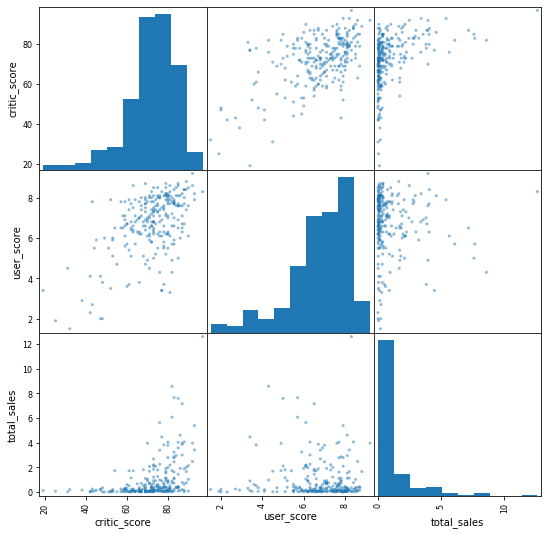

In [24]:
ps4_critic_score = ps4_current_period[ps4_current_period['critic_score'] != -1]
ps4_user_score = ps4_current_period[ps4_current_period['user_score'] != -1]
corr_df = pd.DataFrame()
corr_df['critic_score'] = ps4_critic_score['critic_score']
corr_df['user_score'] = ps4_user_score['user_score']
corr_df['total_sales'] = ps4_current_period['total_sales']
#матрица корреляции пользовательских оценок и критиков
corr_tab = corr_df[['critic_score', 'user_score', 'total_sales']].corr()
display(corr_tab)

#построим диаграммы рассеяния
pd.plotting.scatter_matrix(corr_df, figsize=(9,9))



Видим сильную корреляцию между пользовательскими оценками и оценками критиков. Слабая корреляция между оценками критиков и продажами, а с пользовательскими - вообще отрицательная :'| Возможно, из-за большого количества негативных отзывов пользователей. Можно заметить схожую тенденцию

In [25]:
#оформим проделанные действия в функцию, чтобы можно было получить такую же информацию по другим платформам

def corr_scat_by_platform(platform_name):
    platform_current_period = current_period.query(f'platform == "{platform_name}"').reset_index()
    platform_critic_score = platform_current_period[platform_current_period['critic_score'] != -1]
    platform_user_score = platform_current_period[platform_current_period['user_score'] != -1]
    corr_df = pd.DataFrame()
    corr_df['critic_score'] = platform_critic_score['critic_score']
    corr_df['user_score'] = platform_user_score['user_score']
    corr_df['total_sales'] = platform_current_period['total_sales']
    #матрица корреляции пользовательских оценок и критиков
    corr_tab = corr_df[['critic_score', 'user_score', 'total_sales']].corr()
    display(corr_tab)

    #построим диаграммы рассеяния
    pd.plotting.scatter_matrix(corr_df, figsize=(9,9))



,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.094003
total_sales,0.416998,-0.094003,1.000000


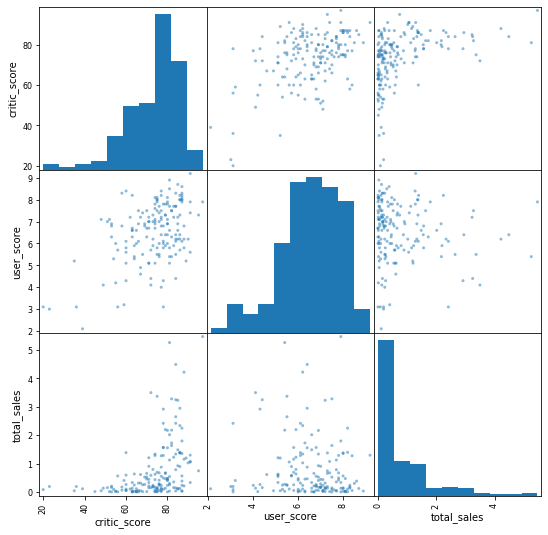

In [26]:
#для XOne
corr_scat_by_platform("XOne")

Видим, что распределения примерно одинаковые.

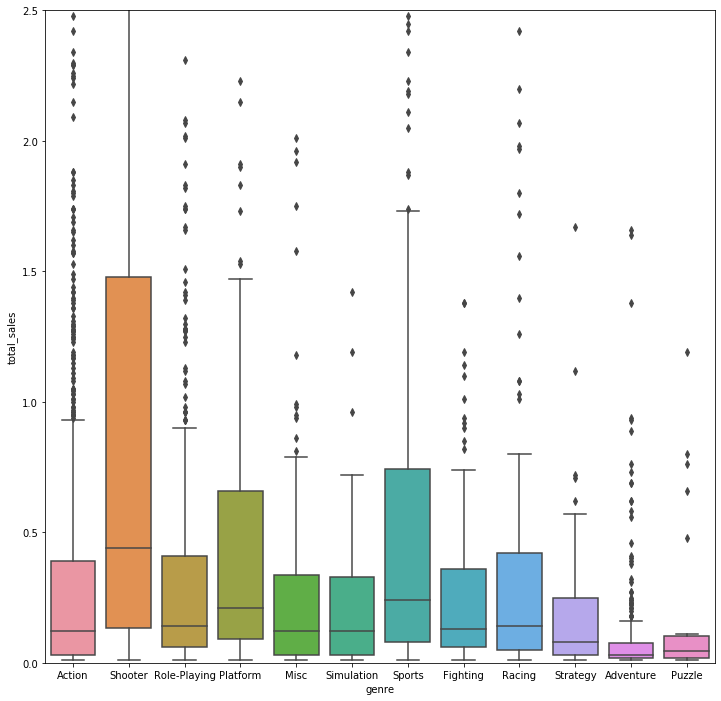

In [27]:
plt.figure(figsize=(12, 12))
ax = sns.boxplot(x="genre", y="total_sales", data=current_period).set_ylim(0,2.5)

Самый популярный жанр - shooter, затем - action, на третьем месте - sports. Мало кто любит пазлы, стратегии и симуляторы.

# ШАГ 4:

In [28]:
#функция для определения 5-ки лучших по в каждом регионе
def top_5(column):
    games.groupby(by=column).agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
    games.groupby(by=column).agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
    games.groupby(by=column).agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar')

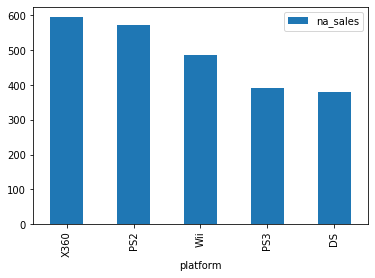

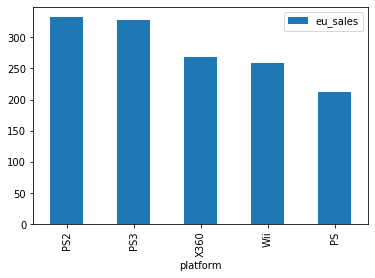

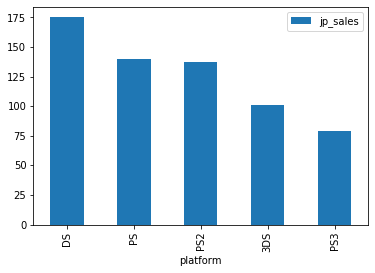

In [29]:
# топ-5 популярных платформ для каждого региона
top_5('platform')

Самая популярная платформа в Америке- X360, но в Европе она  на 3-ем месте, а в Японии не вошла в топ-5. Европейцы отдают предпостение PS2, что находится и в тройке лидеров и в Америке, но в Японии занимает 3-е место. Японцы же любят DS, что тоже находится в топ-5 у Америки, а в Европе не вошел в 5-ку лидеров.

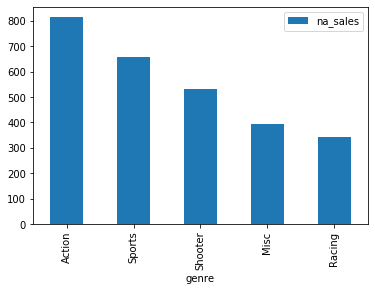

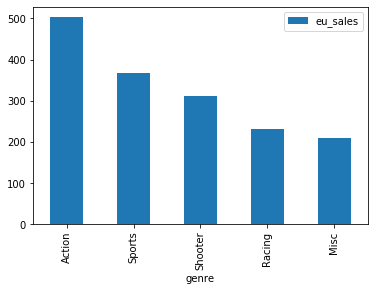

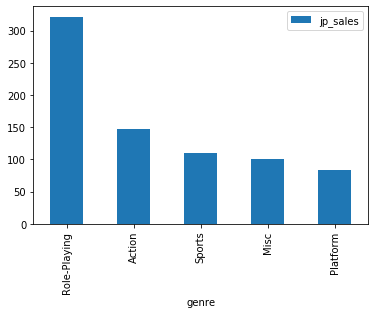

In [30]:
#топ-5 популярных жанров в каждом регионе
top_5('genre')

Вкусы у американцев и европейцев похожи, первая тройка лидеров у них одиниковая и больше всего они предпочитают жанр action. А вот японцы очень любят ролевые игры, но не жалуют гонки.

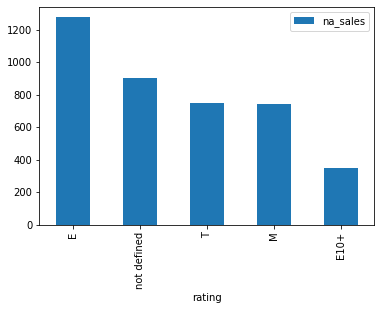

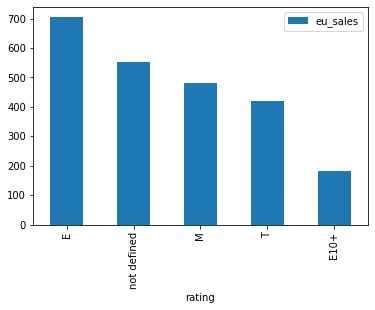

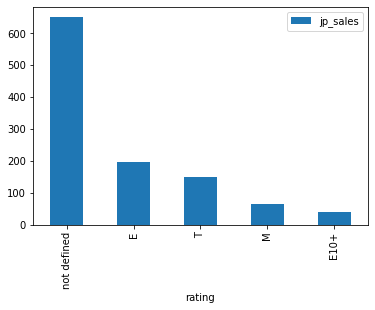

In [31]:
# топ-5 рейтингов ESRB для каждого региона
games['rating'] = games['rating'].fillna('not defined')
top_5('rating')

Группа для всех( E- everyone) — лидер в США, Европе и Японии. Логично, так как название группы предполагает максимальный охват. Дальше начинаются различия.
- в США: для подростков (T - teens) и старше 18 лет (M-mature) занимают 2-3 место, но группы примерно одинаковые.
- в Европе: старше 18 лет - 2 место, подростки - 3, подростки играют меньше чем взрослые.
- в Японии: подростки - 2, взрослые - 3, подростки в этой стране очень много играют в компьютерные игры

Теперь видим, что игры без рейтинга имеют место в первой тройке лидеров.

# ШАГ 5:

In [32]:
# функция для проверки гипотез вида (средние двух генеральных совокупностей равны между собой)
def check_hypothesis(x, y):
    alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

    results = st.ttest_ind(x, y, equal_var=False)

    print('p-значение:', results.pvalue)

    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")
#функция, находящая среднее, дисперсию и стандартное отклонение
def mean_var_std(field):
    mean_df = field.mean()
    var_df = np.var(field, ddof=1)
    std_dev = np.std(field, ddof=1)
    print('среднее - {:.2f}, дисперсия - {:.2f}, стандартное отклонение - {:.2f}'.format(mean_df, var_df, std_dev))

Проверим гипотезы:
    - Н0 = Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - Н1 = Средние пользовательские рейтинги платформ Xbox One и PC разные

In [33]:
xone = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']
mean_var_std(xone)
mean_var_std(pc)
check_hypothesis(xone, pc)


среднее - 6.52, дисперсия - 1.91, стандартное отклонение - 1.38
среднее - 7.07, дисперсия - 2.32, стандартное отклонение - 1.52
p-значение: 3.442937492775816e-06
Отвергаем нулевую гипотезу


Таким образом, средние пользовательские рейтинги платформ Xbox One и PC разные.

Проверим гипотезы:
    - Н0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
    - Н1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [34]:
action = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
sports = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
mean_var_std(action)
mean_var_std(sports)
check_hypothesis(action, sports)

среднее - 7.06, дисперсия - 2.03, стандартное отклонение - 1.42
среднее - 6.95, дисперсия - 2.62, стандартное отклонение - 1.62
p-значение: 0.07370217419278534
Не получилось отвергнуть нулевую гипотезу


Получили, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

# ШАГ 6:

Видим, что с начала 00-ых постепенный рост релизов, с усовершенствованием видеоадаптеров. Пик приходится на 2008г. Но с 2010 видим спад, что связано скорее всего с переходом на мобильные платформы. Но рынок еще не умер, он скорее возрождается с появлением киберспорта, думаю спрос на разработку игр будет расти. 

Но все же, платформы PS4, PS3, X360, 3DS, XOne занимали лидирующие позиции с 2012г. Средняя продолжительность существования платформ составляет примерно 10-11 лет. К 2016 году релизы на платформах PS4, XOne, 3DS выросли, что показывает их потенциальную прибыльность. Также виден спад на платформах PS3, X360 и Wii, которые лидировали ранее.

Существует сильная корреляция между пользовательскими оценками и оценками критиков. Слабая корреляция между оценками критиков и продажами, а с пользовательскими - вообще отрицательная. Возможно, из-за большого количества негативных отзывов пользователей. Можно заметить схожую тенденцию с другими платформами.

Самый популярный жанр - shooter, затем - action, на третьем месте - sports. Мало кто любит пазлы, стратегии и симуляторы.
Я согласна с тем, что популярные жанры требуют хороших инвестиций.

Самая популярная платформа в Америке- X360, но в Европе она на 3-ем месте, а в Японии не вошла в топ-5. Европейцы отдают предпостение PS2, что находится и в тройке лидеров и в Америке, но в Японии занимает 3-е место. Японцы же любят DS, что тоже находится в топ-5 у Америки, а в Европе не вошел в 5-ку лидеров.

Вкусы у американцев и европейцев похожи, первая тройка лидеров у них одиниковая и больше всего они предпочитают жанр action. А вот японцы очень любят ролевые игры, но не жалуют гонки. 

Игры без рейтинга занимают высокие позиции во всех регионах.
Группа для всех( E- everyone) — лидер в США, Европе и Японии. Логично, так как название группы предполагает максимальный охват. Дальше начинаются различия.
- в США: для подростков (T - teens) и старше 18 лет (M-mature) занимают 2-3 место, но группы примерно одинаковые.
- в Европе: старше 18 лет - 2 место, подростки - 3, подростки играют меньше чем взрослые.
- в Японии: подростки - 2, взрослые - 3, подростки в этой стране очень много играют в компьютерные игры
 
Таким образом, средние пользовательские рейтинги платформ Xbox One и PC разные.
Получили, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
Рекомендации: быть внимательным при наборе данных. 